In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
taruntiwarihp_phishing_site_urls_path = kagglehub.dataset_download('taruntiwarihp/phishing-site-urls')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-site-urls/phishing_site_urls.csv


**Analysing Dataset**

In [3]:
dataset = pd.read_csv("/kaggle/input/phishing-site-urls/phishing_site_urls.csv")

In [4]:
dataset.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [5]:
dataset.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [6]:
print("Dataset shape:", dataset.shape)

Dataset shape: (549346, 2)


In [7]:
dataset.keys()

Index(['URL', 'Label'], dtype='object')

In [8]:
dataset.isnull().sum()

URL      0
Label    0
dtype: int64

**Data Preprocessing**

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Label' column into integers
label_encoder = LabelEncoder()
dataset['class_url'] = label_encoder.fit_transform(dataset['Label'])

# Display the distribution of encoded classes
print("Class distribution:\n", dataset['class_url'].value_counts())

# Display the most frequent URLs
print("\nTop repeated URLs:\n", dataset['URL'].value_counts().head())


Class distribution:
 class_url
1    392924
0    156422
Name: count, dtype: int64

Top repeated URLs:
 URL
jhomitevd2abj3fk.tor2web.org/    52
jhomitevd2abj3fk.onion.to/       52
zjfq4lnfbs7pncr5.onion.to/       44
zjfq4lnfbs7pncr5.tor2web.org/    44
5n7y4yihirccftc5.tor2web.org/    42
Name: count, dtype: int64


In [10]:
dataset

,URL,Label,class_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0
3,mail.printakid.com/www.online.americanexpress....,bad,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0
...,...,...,...
549341,23.227.196.215/,bad,0
549342,apple-checker.org/,bad,0
549343,apple-iclods.org/,bad,0
549344,apple-uptoday.org/,bad,0


In [11]:
# Remove 'www.' from URLs
dataset['URL'] = dataset['URL'].str.replace(r'^www\.', '', regex=True)
print(dataset)

                                                      URL Label  class_url
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...   bad          0
1       dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...   bad          0
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....   bad          0
3       mail.printakid.com/www.online.americanexpress....   bad          0
4       thewhiskeydregs.com/wp-content/themes/widescre...   bad          0
...                                                   ...   ...        ...
549341                                    23.227.196.215/   bad          0
549342                                 apple-checker.org/   bad          0
549343                                  apple-iclods.org/   bad          0
549344                                 apple-uptoday.org/   bad          0
549345                                  apple-search.info   bad          0

[549346 rows x 3 columns]


In [12]:
# Create a feature for URL length
dataset['url_len'] = dataset['URL'].apply(lambda x: len(str(x)))

dataset

,URL,Label,class_url,url_len
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177
3,mail.printakid.com/www.online.americanexpress....,bad,0,60
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116
...,...,...,...,...
549341,23.227.196.215/,bad,0,15
549342,apple-checker.org/,bad,0,18
549343,apple-iclods.org/,bad,0,17
549344,apple-uptoday.org/,bad,0,18


In [13]:
!pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 9.5 MB/s eta 0:00:00


In [14]:
from urllib.parse import urlparse
import re

# Function to check if the hostname appears in the full URL
def abnormal_url(url):
    hostname = urlparse(url).hostname
    if hostname and re.search(re.escape(hostname), url):
        return 1  # Normal URL
    else:
        return 0  # Abnormal URL

# Apply the abnormal_url function to each URL in the dataset
dataset['abnormal_url'] = dataset['URL'].apply(abnormal_url)
dataset

,URL,Label,class_url,url_len,abnormal_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0
...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0
549342,apple-checker.org/,bad,0,18,0
549343,apple-iclods.org/,bad,0,17,0
549344,apple-uptoday.org/,bad,0,18,0


In [15]:
# Check the distribution of abnormal_url values
print(dataset['abnormal_url'].value_counts())


abnormal_url
0    549215
1       131
Name: count, dtype: int64


In [16]:
import re

# Function to detect if an IP address is present in the URL
def having_ip_address(url: str) -> int:
    # Regular expression for matching IPv4, hexadecimal IPv4, and IPv6 addresses
    match = re.search(
        r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\/)|'  # IPv4
        r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\/)'  # Hexadecimal IPv4
        r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # IPv6

    if match:
        return 1  # IP address found
    else:
        return 0  # No IP address found

# Apply the function to the 'URL' column
dataset['use_of_ip_address'] = dataset['URL'].apply(having_ip_address)

# Preview the new feature
print(dataset[['URL', 'use_of_ip_address']].head())

dataset

                                                 URL  use_of_ip_address
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...                  0
1  dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...                  0
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....                  0
3  mail.printakid.com/www.online.americanexpress....                  0
4  thewhiskeydregs.com/wp-content/themes/widescre...                  0


,URL,Label,class_url,url_len,abnormal_url,use_of_ip_address
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0,0
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0,0
...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0,1
549342,apple-checker.org/,bad,0,18,0,0
549343,apple-iclods.org/,bad,0,17,0,0
549344,apple-uptoday.org/,bad,0,18,0,0


In [17]:
# Check the distribution of use_of_ip_address values
print(dataset['use_of_ip_address'].value_counts())


use_of_ip_address
0    543634
1      5712
Name: count, dtype: int64


In [18]:
# List of special characters to count in URLs
features = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']

# Count occurrences of each feature in the 'URL' column and create new columns
for feature in features:
    dataset[feature] = dataset['URL'].apply(lambda url: url.count(feature))
dataset

,URL,Label,class_url,url_len,abnormal_url,use_of_ip_address,@,?,-,=,.,#,%,+,$,!,*,",",//
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0,0,0,1,4,4,6,0,0,0,0,0,0,0,0
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0,0,0,0,1,0,7,0,0,0,0,0,0,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0
549342,apple-checker.org/,bad,0,18,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
549343,apple-iclods.org/,bad,0,17,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
549344,apple-uptoday.org/,bad,0,18,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [19]:
# List of special characters to count in URLs
features = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']

# Count occurrences of each special character in the 'URL' column and create new columns
for feature in features:
    dataset[feature] = dataset['URL'].apply(lambda url: url.count(feature))
dataset

,URL,Label,class_url,url_len,abnormal_url,use_of_ip_address,@,?,-,=,.,#,%,+,$,!,*,",",//
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0,0,0,1,4,4,6,0,0,0,0,0,0,0,0
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0,0,0,0,1,0,7,0,0,0,0,0,0,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0
549342,apple-checker.org/,bad,0,18,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
549343,apple-iclods.org/,bad,0,17,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
549344,apple-uptoday.org/,bad,0,18,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [20]:
from urllib.parse import urlparse

# Function to check if the URL uses HTTPS
def httpSecured(url: str) -> int:
    scheme = urlparse(url).scheme  # Extract the scheme (http or https)
    return 1 if scheme == 'https' else 0  # Return 1 if HTTPS, otherwise 0

# Apply the function to the 'URL' column and create a new feature 'https'
dataset['https'] = dataset['URL'].apply(httpSecured)
dataset


,URL,Label,class_url,url_len,abnormal_url,use_of_ip_address,@,?,-,=,.,#,%,+,$,!,*,",",//,https
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0,0,0,1,4,4,6,0,0,0,0,0,0,0,0,0
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0,0,0,0,2,2,4,0,0,0,0,0,0,0,0,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0,0,0,0,1,0,7,0,0,0,0,0,0,0,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0
549342,apple-checker.org/,bad,0,18,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
549343,apple-iclods.org/,bad,0,17,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
549344,apple-uptoday.org/,bad,0,18,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [21]:
# Function to count the number of digits in the URL
def digit_count(url: str) -> int:
    # Count digits in the URL string
    return sum(c.isnumeric() for c in url)

# Apply the function to the 'URL' column and create a new feature 'digits'
dataset['digits'] = dataset['URL'].apply(digit_count)

# Preview the new 'digits' feature
print(dataset[['URL', 'digits']].head())

dataset

                                                 URL  digits
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...      58
1  dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...       1
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....      47
3  mail.printakid.com/www.online.americanexpress....       0
4  thewhiskeydregs.com/wp-content/themes/widescre...      21


,URL,Label,class_url,url_len,abnormal_url,use_of_ip_address,@,?,-,=,...,#,%,+,$,!,*,",",//,https,digits
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0,0,0,1,4,4,...,0,0,0,0,0,0,0,0,0,58
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,47
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
549342,apple-checker.org/,bad,0,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
549343,apple-iclods.org/,bad,0,17,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
549344,apple-uptoday.org/,bad,0,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Function to count the number of letters in the URL
def letter_count(url: str) -> int:
    # Count alphabetic characters (letters) in the URL string
    return sum(c.isalpha() for c in url)

# Apply the function to the 'URL' column and create a new feature 'letters'
dataset['letters'] = dataset['URL'].apply(letter_count)
dataset

,URL,Label,class_url,url_len,abnormal_url,use_of_ip_address,@,?,-,=,...,%,+,$,!,*,",",//,https,digits,letters
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0,0,0,1,4,4,...,0,0,0,0,0,0,0,0,58,135
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0,0,0,0,2,2,...,0,0,0,0,0,0,0,0,1,62
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,47,111
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,52
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,21,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0
549342,apple-checker.org/,bad,0,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
549343,apple-iclods.org/,bad,0,17,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,14
549344,apple-uptoday.org/,bad,0,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15


In [23]:
import re

# Function to check if the URL uses a shortening service
def Shortening_Service(url: str) -> int:
    # List of common URL shortening services
    shortening_services = (
        'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|yfrog\.com|'
        'migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|short\.to|BudURL\.com|'
        'ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|doiop\.com|short\.ie|kl\.am|'
        'wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|'
        'cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|'
        'buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|'
        'qr\.net|1url\.com|tweez\.me|v\.gd|tr\.im|link\.zip\.net'
    )
    # Search for any matching shortening service in the URL
    match = re.search(shortening_services, url)

    # Return 1 if match found, otherwise return 0
    return 1 if match else 0

# Apply the function to the 'URL' column and create a new feature 'Shortining_Service'
dataset['Shortining_Service'] = dataset['URL'].apply(Shortening_Service)
dataset

,URL,Label,class_url,url_len,abnormal_url,use_of_ip_address,@,?,-,=,...,+,$,!,*,",",//,https,digits,letters,Shortining_Service
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0,0,0,1,4,4,...,0,0,0,0,0,0,0,58,135,0
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0,0,0,0,2,2,...,0,0,0,0,0,0,0,1,62,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0,0,0,0,1,0,...,0,0,0,0,0,0,0,47,111,0
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,52,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0,0,0,1,1,0,...,0,0,0,0,0,1,0,21,82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,11,0,0
549342,apple-checker.org/,bad,0,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,15,0
549343,apple-iclods.org/,bad,0,17,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,14,0
549344,apple-uptoday.org/,bad,0,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,15,0


In [24]:
!pip install googlesearch-python

In [25]:
from googlesearch import search

# Function to check if a URL is indexed by Google
def google_index(url: str) -> int:
    # Search the URL on Google and retrieve the top 5 results
    site = search(url, num_results=5)
    return 1 if site else 0  # Return 1 if indexed, otherwise 0

# Apply the function to the 'URL' column and create a new feature 'google_index'
dataset['google_index'] = dataset['URL'].apply(google_index)
dataset

,URL,Label,class_url,url_len,abnormal_url,use_of_ip_address,@,?,-,=,...,$,!,*,",",//,https,digits,letters,Shortining_Service,google_index
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,0,225,0,0,0,1,4,4,...,0,0,0,0,0,0,58,135,0,1
1,dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_...,bad,0,77,0,0,0,0,2,2,...,0,0,0,0,0,0,1,62,0,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,0,177,0,0,0,0,1,0,...,0,0,0,0,0,0,47,111,0,1
3,mail.printakid.com/www.online.americanexpress....,bad,0,60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,52,0,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,0,116,0,0,0,1,1,0,...,0,0,0,0,1,0,21,82,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,bad,0,15,0,1,0,0,0,0,...,0,0,0,0,0,0,11,0,0,1
549342,apple-checker.org/,bad,0,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,15,0,1
549343,apple-iclods.org/,bad,0,17,0,0,0,0,1,0,...,0,0,0,0,0,0,0,14,0,1
549344,apple-uptoday.org/,bad,0,18,0,0,0,0,1,0,...,0,0,0,0,0,0,0,15,0,1


In [26]:
dataset.isnull().sum()

URL                   0
Label                 0
class_url             0
url_len               0
abnormal_url          0
use_of_ip_address     0
@                     0
?                     0
-                     0
=                     0
.                     0
#                     0
%                     0
+                     0
$                     0
!                     0
*                     0
,                     0
//                    0
https                 0
digits                0
letters               0
Shortining_Service    0
google_index          0
dtype: int64

In [27]:
dataset.shape

(549346, 24)

**Data Training and Testing**

In [28]:
# Dropping unnecessary columns and creating feature set 'X'
X = dataset.drop(['URL', 'Label', 'class_url', '@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//'], axis=1)

# Target variable 'y' is the class_url column
y = dataset['class_url']


In [29]:
X

,url_len,abnormal_url,use_of_ip_address,https,digits,letters,Shortining_Service,google_index
0,225,0,0,0,58,135,0,1
1,77,0,0,0,1,62,0,1
2,177,0,0,0,47,111,0,1
3,60,0,0,0,0,52,0,1
4,116,0,0,0,21,82,0,1
...,...,...,...,...,...,...,...,...
549341,15,0,1,0,11,0,0,1
549342,18,0,0,0,0,15,0,1
549343,17,0,0,0,0,14,0,1
549344,18,0,0,0,0,15,0,1


In [30]:
y

0         0
1         0
2         0
3         0
4         0
         ..
549341    0
549342    0
549343    0
549344    0
549345    0
Name: class_url, Length: 549346, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=5)


In [32]:
print(f"X_train Shape : {X_train.shape}")  # Shape of the training features
print(f"Y_train Shape : {y_train.shape}")  # Shape of the training target variable
print(f"X_test Shape : {X_test.shape}")    # Shape of the test features
print(f"Y_test Shape : {y_test.shape}")    # Shape of the test target variable


X_train Shape : (439476, 8)
Y_train Shape : (439476,)
X_test Shape : (109870, 8)
Y_test Shape : (109870,)


**Model DEveloping CNN**

Epoch 1/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7591 - loss: 0.5426
Epoch 2/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7886 - loss: 0.4927
Epoch 3/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7953 - loss: 0.4817
Epoch 4/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7957 - loss: 0.4795
Epoch 5/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7978 - loss: 0.4765
Epoch 6/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7990 - loss: 0.4748
Epoch 7/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8013 - loss: 0.4710
Epoch 8/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8010 - loss: 0.4697
Epoch 9/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.7993 - loss: 0.4720
Epoch 10/10
13734/13734 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8010 - loss: 0.4699
3434/3434 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
CNN Accuracy: 80.33%


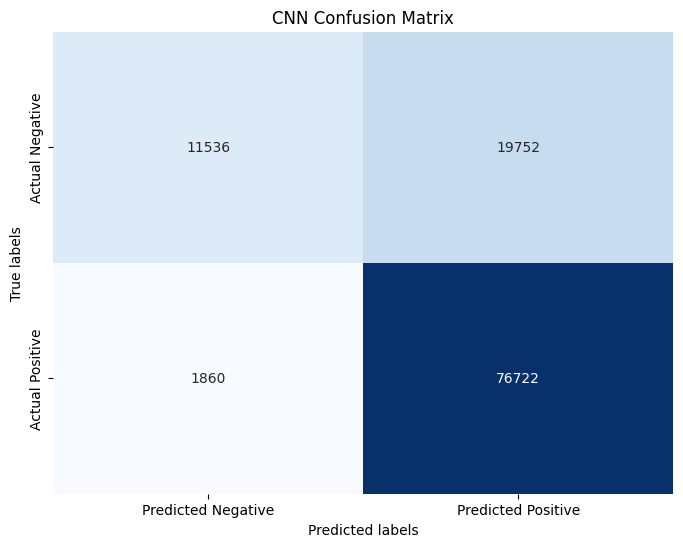


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.37      0.52     31288
           1       0.80      0.98      0.88     78582

    accuracy                           0.80    109870
   macro avg       0.83      0.67      0.70    109870
weighted avg       0.81      0.80      0.77    109870



In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train.values, axis=2)
X_test_cnn = np.expand_dims(X_test.values, axis=2)

# Ensure correct shape: (samples, time_steps, features)
X_train_cnn = np.array(X_train_cnn).reshape(len(X_train_cnn), -1, 1)
X_test_cnn = np.array(X_test_cnn).reshape(len(X_test_cnn), -1, 1)

# Build CNN model
cnn = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),  # Correct input shape
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)

# Predict probabilities
cnn_pred = cnn.predict(X_test_cnn).ravel()

# Convert probabilities to class labels
y_pred = (cnn_pred > 0.5).astype(int)

# 1. Accuracy
accuracy = cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Accuracy: {accuracy[1]:.2%}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


**SVM**

SVM Accuracy: 73.77%


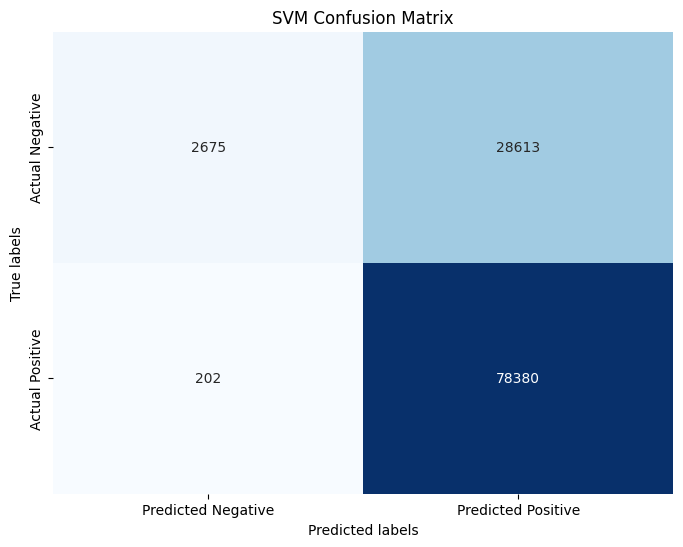


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.09      0.16     31288
           1       0.73      1.00      0.84     78582

    accuracy                           0.74    109870
   macro avg       0.83      0.54      0.50    109870
weighted avg       0.79      0.74      0.65    109870



In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM on a smaller sample due to performance
X_train_small = X_train[:5000]
y_train_small = y_train[:5000]

# Train SVM model
svm = SVC(probability=True)
svm.fit(X_train_small, y_train_small)

# Predict probabilities for ensemble
svm_pred = svm.predict_proba(X_test)[:, 1]

# Predict class labels
y_pred = svm.predict(X_test)

# Accuracy & Evaluation
def print_results(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.2%}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate
print_results(svm, X_test, y_test, 'SVM')


**MLP**

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 79.91%


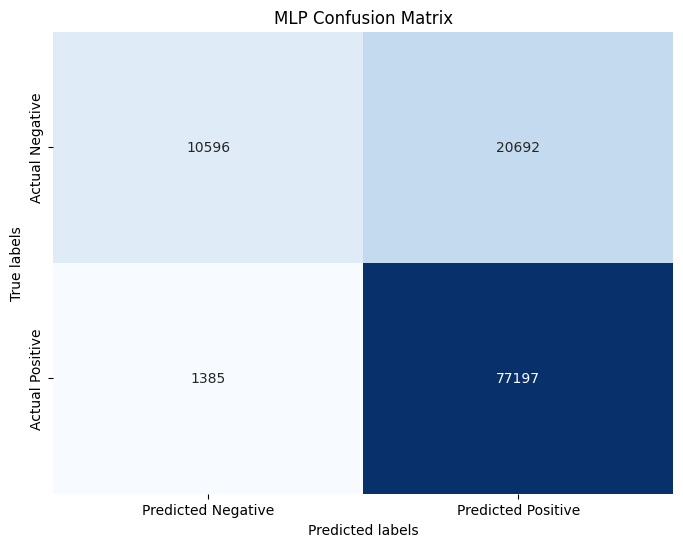


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.34      0.49     31288
           1       0.79      0.98      0.87     78582

    accuracy                           0.80    109870
   macro avg       0.84      0.66      0.68    109870
weighted avg       0.82      0.80      0.77    109870



In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train MLP
mlp = MLPClassifier(max_iter=3)
mlp.fit(X_train, y_train)

# Predict probabilities for ensemble
mlp_pred = mlp.predict_proba(X_test)[:, 1]

# Predict class labels
y_pred = mlp.predict(X_test)

# Accuracy & Evaluation
def print_results(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.2%}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluate
print_results(mlp, X_test, y_test, 'MLP')


ENSEMBLE Mode

Ensemble Model Accuracy: 79.50%


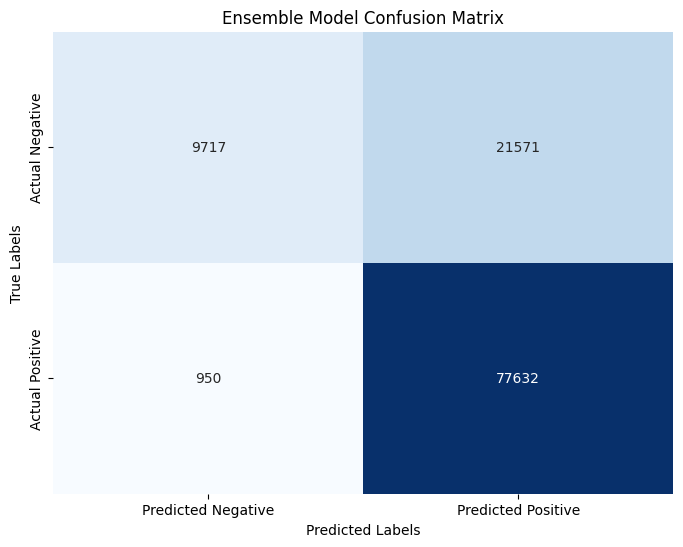


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.31      0.46     31288
           1       0.78      0.99      0.87     78582

    accuracy                           0.80    109870
   macro avg       0.85      0.65      0.67    109870
weighted avg       0.82      0.80      0.76    109870



In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Combine predictions (averaging probabilities)
ensemble_pred = (svm_pred + mlp_pred + cnn_pred) / 3

# Convert to class labels based on threshold
ensemble_pred_class = (ensemble_pred > 0.5).astype(int)

# Function to print evaluation results
def print_results(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f"{model_name} Accuracy: {acc:.2%}")

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Call the function for ensemble model
print_results(y_test, ensemble_pred_class, "Ensemble Model")
